# SuperKnowa Model Evaluation on CoQA Q&A Dataset

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
cd /Users/sahil/Documents/GitHub/Foundation-models/App_Evaluation/CoQA evaluation/result_1k/

/Users/sahil/Documents/GitHub/Foundation-models/App_Evaluation/CoQA evaluation/result_1k


In [39]:
ls

SuperKnowa_Coqa_Llama.csv   SuperKnowa_Coqa_flanT5.csv
SuperKnowa_Coqa_bloom.csv


Model Used for evaluation with 1000 Q&A from CoQA dataset
- Bloom
- FlanT5
- Llama (Pre-trained)

Evaluation Matrix used

- blue score
- meteor score
- rouge score
- SentenceSim score
- SimHash score
- perplexity score
- bleurt score
- F1 score

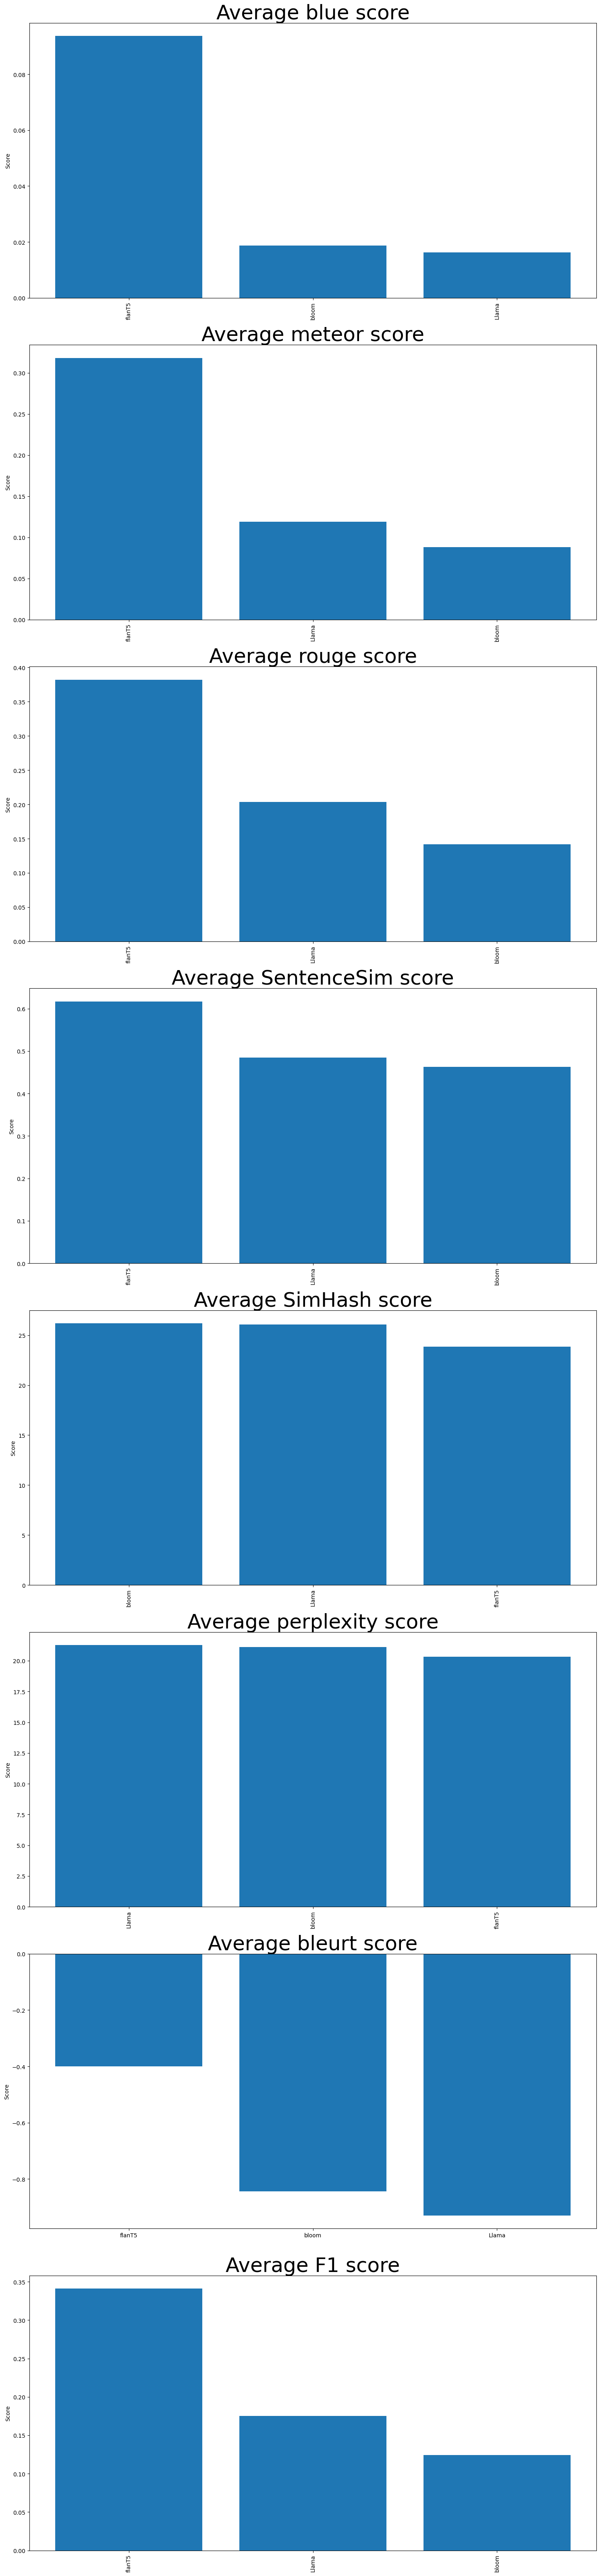

In [33]:

# Define the list of scores
scores = ['blue score', 'meteor score', 'rouge score', 'SentenceSim score', 'SimHash score', 'perplexity score', 'bleurt score', 'F1 score']

# Calculate the number of rows and columns for subplots
num_plots = len(scores)
num_cols = 1
num_rows = (num_plots + num_cols - 1) // num_cols

# Create the subplots with appropriate size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8*num_rows))

# Flatten the axes array to iterate through
axes = axes.flatten()

# Load all CSV files into a list of dataframes
csv_files = glob.glob("*.csv")
dfs = [pd.read_csv(file) for file in csv_files]


# Iterate over the scores and create subplots
for i, score in enumerate(scores):
    averages = []
    for df, file in zip(dfs, csv_files):
        model_name = file.split(".")[0]
        avg_score = df[score].mean()
        averages.append({"model_name": model_name, "average_score": avg_score})

    # Create a new DataFrame to store the average score for each model
    results_df = pd.DataFrame(averages)

    # Sort the DataFrame by the average score in descending order
    results_df = results_df.sort_values(by="average_score", ascending=False)

    # Create a bar chart for the current score
    ax = axes[i]
    ax.bar(results_df["model_name"], results_df["average_score"])
    ax.set_title(f"Average {score}", fontsize=36) 
    ax.set_ylabel("Score")
    ax.tick_params(axis='x', rotation=90)

    # Modify x-axis labels
    modified_labels = [label.split("_")[-1] for label in results_df["model_name"]]
    ax.set_xticks(range(len(modified_labels)))  # Set the tick positions
    ax.set_xticklabels(modified_labels)  # Set the tick labels

    # Rotate x-axis labels for the second last bar chart
    if i == num_plots - 2:
        ax.tick_params(axis='x', rotation=0)

# Remove any unused subplots
if len(scores) < num_plots:
    for j in range(len(scores), num_plots):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


In [34]:
df

,question,context,ideal_answer,answer,blue score,meteor score,rouge score,SentenceSim score,SimHash score,perplexity score,bleurt score,F1 score
0,Identify the odd one out.,"Twitter, Instagram, Telegram",Telegram,1. Twitter is a microblogging platform. 2. In...,1.115425e-312,0.002953,0.013889,0.472057,27,1.933278,-0.886688,0.016393
1,Explain why the following fraction is equivale...,4/16,The fraction 4/16 is equivalent to 1/4 because...,. a. 3/8 b. 2/4 c. 1/2 d. 1/4 a. 3/8 = 3/8 + 0...,8.044949e-234,0.009036,0.056338,0.248900,35,29.994287,-0.884714,0.017094
2,Evaluate this sentence for spelling and gramma...,He finnished his meal and left the resturant,He finished his meal and left the restaurant.,. He finnished his meal and left the resturant...,1.598205e-01,0.373583,0.500000,0.749773,13,8.281993,-0.712102,0.476190
3,"Classify the following into animals, plants, a...","Oak tree, copper ore, elephant",Oak tree: Plant\n Copper ore: Mineral\n Elepha...,". Oak tree, copper ore, elephant are animals, ...",3.513310e-155,0.384909,0.842105,0.938463,25,8.912095,-0.054478,0.526316
4,Reverse engineer this code to create a new ver...,def factorialize(num):\n factorial = 1\n for...,def factorialize(num):\n factorial = 1\n for...,of factorialize that returns the factorial of...,1.881367e-02,0.146354,0.340426,0.691330,13,15.535948,-0.914533,0.325000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Discuss the impact of disruptive technology on...,Media industry,The media industry has seen a huge shift in ho...,Discuss the impact of disruptive technology o...,5.233751e-79,0.086374,0.168067,0.352136,26,51.848925,-0.332087,0.120603
996,Evaluate the usability of a given app.,Evernote,Evernote is a great app for anyone looking to ...,Why or why not? Evernote is a note-taking app...,3.196735e-02,0.143134,0.250000,0.793916,16,44.720349,-0.385405,0.232558
997,Generate a headline for a news article about a...,noinput,"""Cyberattack Hits Businesses on a Global Scale"".",The headline should be catchy and attention-g...,2.309710e-236,0.009407,0.025316,0.330474,22,8.000000,-1.051925,0.027397
998,Make this sentence more polite.,You should do that as soon as possible,"If possible, could you please do that as soon ...",You should do that as soon as possible. You s...,2.238844e-07,0.042962,0.084656,0.382615,17,9.581133,-0.976394,0.084656


In [35]:
# Iterate over the scores and create subplots
for i, score in enumerate(scores):
    averages = []
    for df, file in zip(dfs, csv_files):
        model_name = file.split(".")[0]
        print(model_name,"\n",df.describe().loc['mean'],"\n\n")

SuperKnowa_Coqa_flanT5 
 blue score            0.093683
meteor score          0.318327
rouge score           0.382027
SentenceSim score     0.616914
SimHash score        23.842000
perplexity score     20.313163
bleurt score         -0.400201
F1 score              0.340996
Name: mean, dtype: float64 


SuperKnowa_Coqa_Llama 
 blue score            0.016324
meteor score          0.119041
rouge score           0.203716
SentenceSim score     0.484394
SimHash score        26.096000
perplexity score     21.272829
bleurt score         -0.929731
F1 score              0.175145
Name: mean, dtype: float64 


SuperKnowa_Coqa_bloom 
 blue score            0.018687
meteor score          0.088058
rouge score           0.141556
SentenceSim score     0.463152
SimHash score        26.199000
perplexity score     21.126773
bleurt score         -0.843204
F1 score              0.124287
Name: mean, dtype: float64 


SuperKnowa_Coqa_flanT5 
 blue score            0.093683
meteor score          0.318327
rouge 

In [40]:
import pandas as pd

# List of file names
csv_files = ['SuperKnowa_Coqa_flanT5.csv', 'SuperKnowa_Coqa_Llama.csv', 'SuperKnowa_Coqa_bloom.csv']

# Substring to remove from model names
substring_to_remove = 'SuperKnowa_Coqa_'

# Create an empty DataFrame
leaderboard = pd.DataFrame(columns=['Model Name', 'Blue Score', 'Meteor Score', 'Rouge Score', 'SentenceSim Score', 'SimHash Score', 'Perplexity Score', 'Bleurt Score', 'F1 Score'])

# Iterate over the scores files
for file in csv_files:
    model_name = file.split(".")[0]
    model_name = model_name.replace(substring_to_remove, '')  # Remove the specified substring
    df = pd.read_csv(file)  # Assuming the scores are stored in CSV format
    mean_scores = df.describe().loc['mean']
    leaderboard = leaderboard.append({'Model Name': model_name,
                                      'Blue Score': mean_scores['blue score'],
                                      'Meteor Score': mean_scores['meteor score'],
                                      'Rouge Score': mean_scores['rouge score'],
                                      'SentenceSim Score': mean_scores['SentenceSim score'],
                                      'SimHash Score': mean_scores['SimHash score'],
                                      'Perplexity Score': mean_scores['perplexity score'],
                                      'Bleurt Score': mean_scores['bleurt score'],
                                      'F1 Score': mean_scores['F1 score']}, ignore_index=True)

# Print the leaderboard
print(leaderboard.to_string(index=False))



Model Name  Blue Score  Meteor Score  Rouge Score  SentenceSim Score  SimHash Score  Perplexity Score  Bleurt Score  F1 Score
    flanT5    0.093683      0.318327     0.382027           0.616914         23.842         20.313163     -0.400201  0.340996
     Llama    0.016324      0.119041     0.203716           0.484394         26.096         21.272829     -0.929731  0.175145
     bloom    0.018687      0.088058     0.141556           0.463152         26.199         21.126773     -0.843204  0.124287


/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12556/2638296987.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append({'Model Name': model_name,
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12556/2638296987.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append({'Model Name': model_name,
/var/folders/2q/zbl1dvln0yq_5wjqjkhf54kw0000gn/T/ipykernel_12556/2638296987.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leaderboard = leaderboard.append({'Model Name': model_name,
